In [35]:
from pycaret.classification import *
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFECV

In [36]:
DATA_PATH = 'Dados/dataset_selected.csv'

# Setup

In [37]:
data = pd.read_csv(DATA_PATH)
display(data.describe())
display(data.head())

,h_1,min,h_10,h_20,h_3,h_17,label
count,1.098000e+03,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,3.782214e+07,-16951.988293,5.838466,0.257167,240.678526,4.561905,0.810565
std,2.409757e+07,3312.968049,9.852569,0.441728,266.823485,3.188047,0.585916
min,0.000000e+00,-22543.238281,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.667443e+07,-17707.057617,1.008621,0.014583,127.309212,2.199980,1.000000
50%,3.971325e+07,-17507.904297,2.776686,0.088539,183.627871,3.913946,1.000000
75%,5.957901e+07,-17340.978027,6.430057,0.309519,273.818290,6.269442,1.000000
max,8.505089e+07,0.954279,124.205200,5.270284,3123.819683,20.820562,1.000000


,h_1,min,h_10,h_20,h_3,h_17,label
0,7.198306e+07,-18852.613281,0.029627,0.000518,274.301125,4.468731,1
1,4.912851e+07,-17413.173828,5.129875,0.148661,650.521016,3.066308,1
2,2.494840e+07,-17565.093750,2.556357,0.137572,92.990802,2.010966,1
3,1.606045e+07,-17569.222656,0.918699,0.000880,99.018968,0.929184,1
4,2.177719e+07,-17581.714844,3.048196,0.028213,152.817612,1.707362,1


In [38]:
print(data.describe().round(2).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrr}
\toprule
 & h_1 & min & h_10 & h_20 & h_3 & h_17 & label \\
\midrule
count & 1098.00 & 1098.00 & 1098.00 & 1098.00 & 1098.00 & 1098.00 & 1098.00 \\
mean & 37822141.13 & -16951.99 & 5.84 & 0.26 & 240.68 & 4.56 & 0.81 \\
std & 24097568.06 & 3312.97 & 9.85 & 0.44 & 266.82 & 3.19 & 0.59 \\
min & 0.00 & -22543.24 & 0.00 & 0.00 & 0.00 & 0.00 & -1.00 \\
25% & 16674432.51 & -17707.06 & 1.01 & 0.01 & 127.31 & 2.20 & 1.00 \\
50% & 39713252.33 & -17507.90 & 2.78 & 0.09 & 183.63 & 3.91 & 1.00 \\
75% & 59579012.42 & -17340.98 & 6.43 & 0.31 & 273.82 & 6.27 & 1.00 \\
max & 85050887.20 & 0.95 & 124.21 & 5.27 & 3123.82 & 20.82 & 1.00 \\
\bottomrule
\end{tabular}



In [39]:
s = setup(
    data = data, target = 'label', session_id = 123, profile = False,
    # Treino - Teste
    train_size = 0.5, fix_imbalance = False, data_split_stratify = True,

    # === PREPROCESSAMENTO ===
    preprocess = True,
    
    # Features Polinomiais
    polynomial_features = False, polynomial_degree = 2,
    
    # Multicolinearidade
    remove_multicollinearity = False, multicollinearity_threshold = 0.9,
    
    # Transformação: "applies the power transform to make data more Gaussian-like"
    transformation = False, transformation_method = 'yeo-johnson', # 'yeo-johnson' ou 'quantile'
    
    # Normalização
    normalize = True, normalize_method = 'zscore', # 'zscore', 'minmax', 'maxabs', 'robust'

    # Feature Selection
    feature_selection = False, n_features_to_select = 3, feature_selection_method = 'classic' # 'classic', 'univariate', 'sequential'
)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Target mapping,"-1: 0, 1: 1"
4,Original data shape,"(1098, 7)"
5,Transformed data shape,"(1098, 7)"
6,Transformed train set shape,"(549, 7)"
7,Transformed test set shape,"(549, 7)"
8,Numeric features,6
9,Preprocess,True


In [40]:
get_config()
y_test_transformed = get_config('y_test_transformed')
y_train_transformed = get_config('y_train_transformed')

train_count = np.bincount(y_train_transformed)
test_count = np.bincount(y_test_transformed)
train_prop = (train_count/train_count.sum())*100
test_prop = (test_count/test_count.sum())*100
print(f"Contagem de Classes (treino): {train_count} ({[round(val,3) for val in train_prop]}%)")
print(f"Contagem de Classes (teste): {test_count} ({[round(val,3) for val in test_prop]}%)")

Contagem de Classes (treino): [ 52 497] ([9.472, 90.528]%)
Contagem de Classes (teste): [ 52 497] ([9.472, 90.528]%)


# Seleção de Modelo

## Treinamento

In [41]:
top3 = compare_models(n_select=3)
best = top3[0]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0360
lightgbm,Light Gradient Boosting Machine,0.9982,1.0000,0.9982,0.9985,0.9983,0.9899,0.9904,0.0480
rf,Random Forest Classifier,0.9964,1.0000,0.9964,0.9970,0.9965,0.9798,0.9807,0.0420
ada,Ada Boost Classifier,0.9964,0.9980,0.9964,0.9970,0.9965,0.9798,0.9807,0.0260
nb,Naive Bayes,0.9945,0.9948,0.9945,0.9955,0.9948,0.9697,0.9711,0.0070
dt,Decision Tree Classifier,0.9945,0.9880,0.9945,0.9952,0.9946,0.9677,0.9693,0.0080
qda,Quadratic Discriminant Analysis,0.9945,0.9940,0.9945,0.9955,0.9948,0.9697,0.9711,0.0080
gbc,Gradient Boosting Classifier,0.9927,0.9976,0.9927,0.9933,0.9929,0.9578,0.9587,0.0270
lr,Logistic Regression,0.9891,0.9960,0.9891,0.9896,0.9890,0.9334,0.9353,0.0100
knn,K Neighbors Classifier,0.9890,0.9962,0.9890,0.9896,0.9892,0.9358,0.9367,0.0180


In [42]:
for model in top3:
    holdout_pred = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9964,1.0000,0.9964,0.9965,0.9964,0.9791,0.9793


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9964,0.9969,0.9964,0.9965,0.9964,0.9791,0.9793


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9964,0.9998,0.9964,0.9965,0.9964,0.9791,0.9793


## Avaliação do melhor Modelo

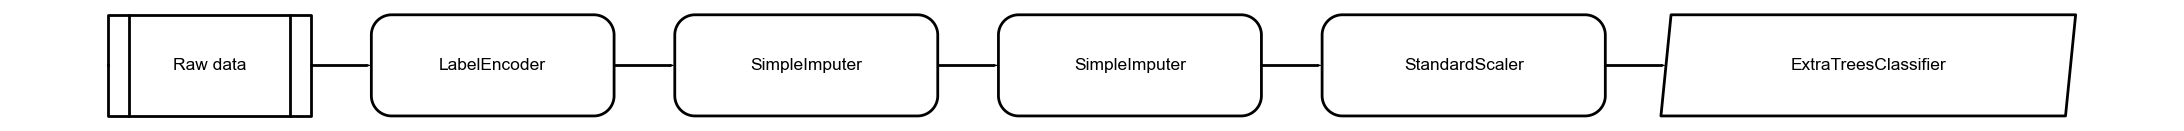

In [43]:
plot_model(best, plot = 'pipeline')

In [44]:
plot_model(best, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


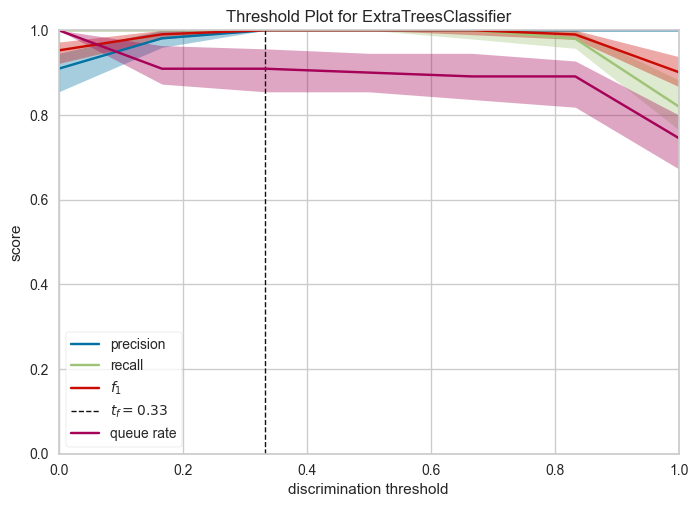

In [52]:
plot_model(best, plot = 'threshold')

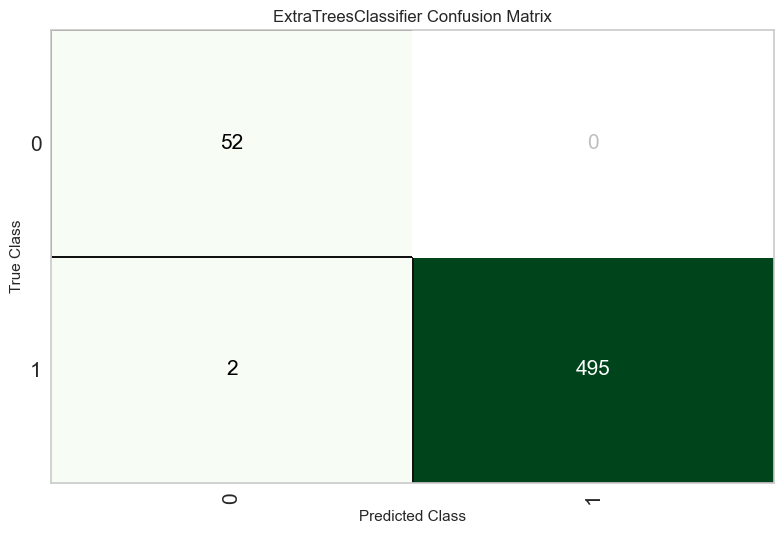

In [54]:
plot_model(best, plot = 'confusion_matrix')

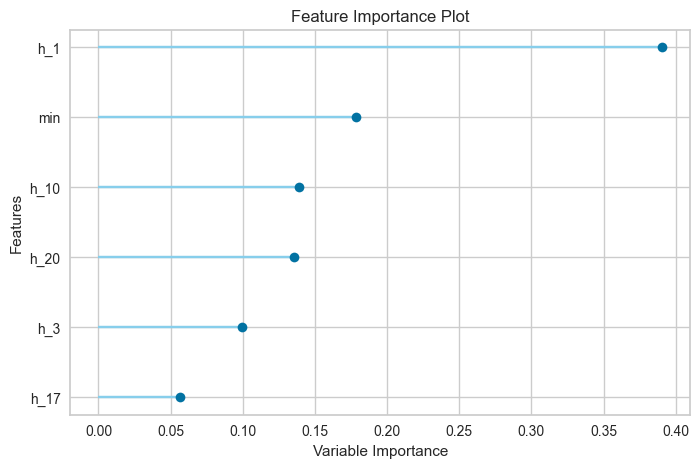

In [47]:
plot_model(best, plot = 'feature')

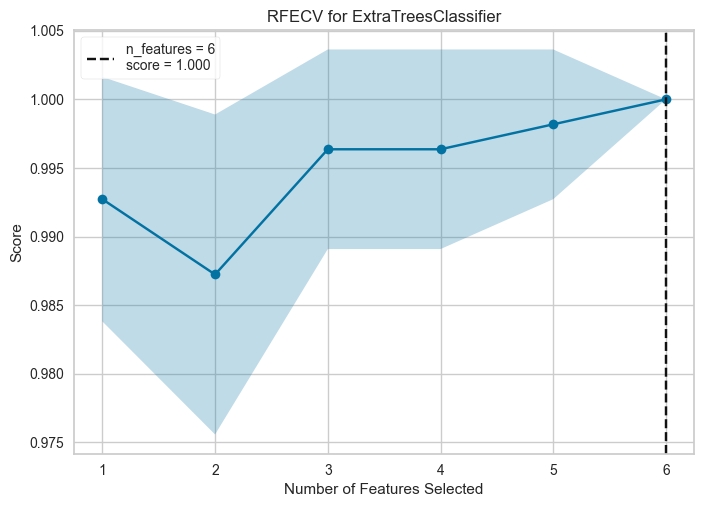

Melhor número de features: 5
Features Selecionadas: ['h_1', 'min', 'h_10', 'h_20', 'h_3']
  Feature  Ranking
0     h_1        1
1     min        1
2    h_10        1
3    h_20        1
4     h_3        1
5    h_17        2


In [48]:
plot_model(best, plot = 'rfe')

# 1. Pegue os dados de treino transformados do PyCaret
X_train = get_config('X_train_transformed')
y_train = get_config('y_train_transformed')

# 2. Defina o modelo que você quer usar para avaliar as features

# 3. Rode o RFE com Cross-Validation manualmente para ter acesso aos dados
# step=1: remove 1 variável por vez
# cv=5: validação cruzada de 5 folds (mesmo padrão do PyCaret)
rfe = RFECV(estimator=best, step=1, cv=5, scoring='accuracy')
rfe.fit(X_train, y_train)

# 4. Ver a quantidade ideal de features
print(f"Melhor número de features: {rfe.n_features_}")

# 5. Listar quais features foram selecionadas no melhor cenário
selected_features = X_train.columns[rfe.support_]
print("Features Selecionadas:", list(selected_features))

# 6. (Opcional) Ver o Ranking de todas as features
# Ranking 1 significa que foi selecionada. Números maiores foram eliminadas antes.
ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print(ranking_df)

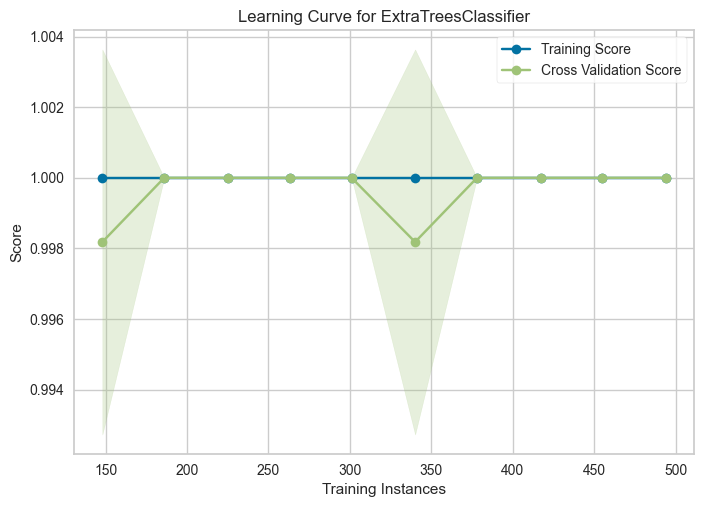

In [49]:
plot_model(best, plot = 'learning')

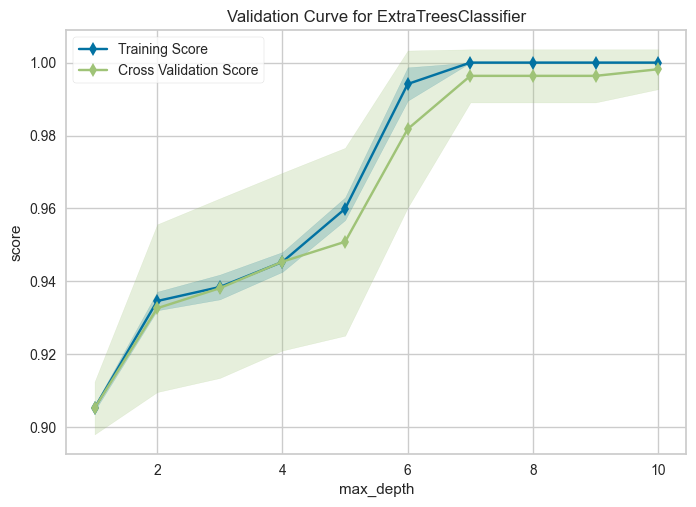

In [50]:
plot_model(best, plot = 'vc')

# Melhor Modelo

In [ ]:
filtered_data = pd.read_csv(DATA_PATH)
filtered_data = filtered_data[list(selected_features) + ['label']]
filtered_data.head()

In [ ]:
s = setup(
    data = filtered_data, target = 'label', session_id = 123, profile = False,
    # Treino - Teste
    train_size = 0.5, fix_imbalance = False, data_split_stratify = True,

    # === PREPROCESSAMENTO ===
    preprocess = True,
    
    # Features Polinomiais
    polynomial_features = False, polynomial_degree = 2,
    
    # Multicolinearidade
    remove_multicollinearity = False, multicollinearity_threshold = 0.9,
    
    # Transformação: "applies the power transform to make data more Gaussian-like"
    transformation = False, transformation_method = 'yeo-johnson', # 'yeo-johnson' ou 'quantile'
    
    # Normalização
    normalize = False, normalize_method = 'zscore', # 'zscore', 'minmax', 'maxabs', 'robust'

    # Feature Selection
    feature_selection = False, n_features_to_select = 3, feature_selection_method = 'classic' # 'classic', 'univariate', 'sequential'
)

In [ ]:
modelo_final = create_model('et')#, probability_threshold = 0.33)

In [ ]:
plot_model(modelo_final, 'confusion_matrix')

In [ ]:
plot_model(modelo_final, plot = 'feature')

In [ ]:
plot_model(modelo_final, plot = 'rfe')

# 1. Pegue os dados de treino transformados do PyCaret
X_train = get_config('X_train_transformed')
y_train = get_config('y_train_transformed')

# 2. Defina o modelo que você quer usar para avaliar as features

# 3. Rode o RFE com Cross-Validation manualmente para ter acesso aos dados
# step=1: remove 1 variável por vez
# cv=5: validação cruzada de 5 folds (mesmo padrão do PyCaret)
rfe = RFECV(estimator=modelo_final, step=1, cv=5, scoring='accuracy')
rfe.fit(X_train, y_train)

# 4. Ver a quantidade ideal de features
print(f"Melhor número de features: {rfe.n_features_}")

# 5. Listar quais features foram selecionadas no melhor cenário
selected_features = X_train.columns[rfe.support_]
print("Features Selecionadas:", list(selected_features))

# 6. (Opcional) Ver o Ranking de todas as features
# Ranking 1 significa que foi selecionada. Números maiores foram eliminadas antes.
ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print(ranking_df)

In [ ]:
plot_model(modelo_final, plot = 'learning')

In [ ]:
plot_model(modelo_final, plot = 'vc')